# Regression and Classification.

In this assignment you'll explore the relationship between model complexity and generalization performance, by adjusting key parameters of various supervised learning models. Part 1 of this assignment will look at regression and Part 2 will look at classification.



First, run the following block to set up the variables needed for later sections.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib.pyplot as plt

In [3]:
# supressing warnings
import warnings
warnings.filterwarnings('ignore')

#### Setting up the data for future ML problems

In [4]:
np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [5]:
len(X_test)

4

In [6]:
len(y_test)

4

In [7]:
# Visualizing the data
def part1_scatter():
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);


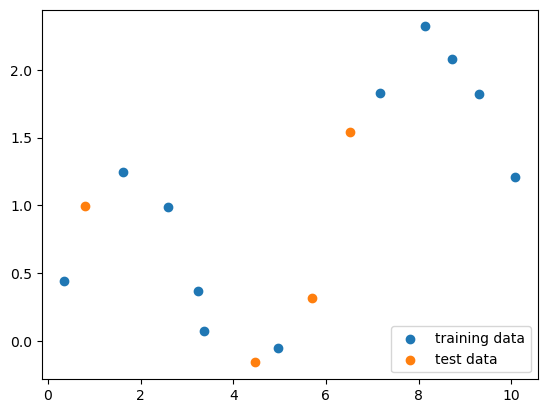

In [8]:
# %matplotlib notebook
part1_scatter()

In [9]:
len(x)

15

## Regression

#### Polynomial Linear Regression model
With degrees 1, 3, 6, and 9

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [11]:
random_state = 0
degrees = [1, 3, 6, 9]

## data to test the
test_input = np.linspace(0,10,100).reshape(-1, 1)
array_curves = np.zeros((4, len(test_input)))

for i, j in enumerate(degrees):

    poly = PolynomialFeatures(degree=j)

    # artificially generating polynomial for features in X_train with j degrees
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))

    # running linear regression with artificial features
    linreg = LinearRegression().fit(X_train_poly, y_train)

    # applying the model to
    input_poly = poly.fit_transform(test_input)
    predictions = linreg.predict(input_poly)
    array_curves[i] = predictions


In [12]:
array_curves

array([[ 2.53040195e-01,  2.69201547e-01,  2.85362899e-01,
         3.01524251e-01,  3.17685603e-01,  3.33846955e-01,
         3.50008306e-01,  3.66169658e-01,  3.82331010e-01,
         3.98492362e-01,  4.14653714e-01,  4.30815066e-01,
         4.46976417e-01,  4.63137769e-01,  4.79299121e-01,
         4.95460473e-01,  5.11621825e-01,  5.27783177e-01,
         5.43944529e-01,  5.60105880e-01,  5.76267232e-01,
         5.92428584e-01,  6.08589936e-01,  6.24751288e-01,
         6.40912640e-01,  6.57073992e-01,  6.73235343e-01,
         6.89396695e-01,  7.05558047e-01,  7.21719399e-01,
         7.37880751e-01,  7.54042103e-01,  7.70203454e-01,
         7.86364806e-01,  8.02526158e-01,  8.18687510e-01,
         8.34848862e-01,  8.51010214e-01,  8.67171566e-01,
         8.83332917e-01,  8.99494269e-01,  9.15655621e-01,
         9.31816973e-01,  9.47978325e-01,  9.64139677e-01,
         9.80301028e-01,  9.96462380e-01,  1.01262373e+00,
         1.02878508e+00,  1.04494644e+00,  1.06110779e+0

In [13]:
array_curves.shape

(4, 100)

In [14]:
# plotting polynomial regression curves
def plot_one(degree_predictions):
    plt.figure(figsize=(10,5))

    # plotting training points
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)

    # plotting testing points
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)

    # plotting the curves
    for i, degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree: {}'.format(degree))

    plt.ylim(-1,2.5)
    plt.legend(loc=4)

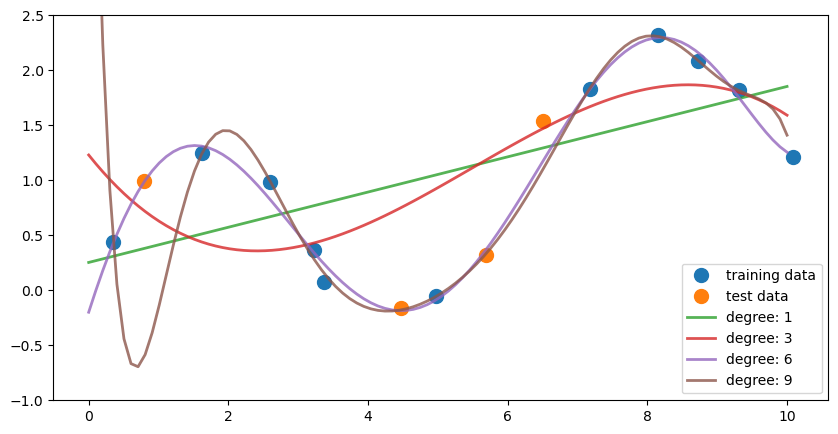

In [15]:
plot_one(array_curves)

We see that the curve with the degree of 6 seems to adapt best to the data.
That being said that may be overfitting and just adapting best to the training data.

#### Comparing R^2 - coefficient of detarmiantion score for different degrees
Degrees: 0 - 9
Computing R^2 on the training data and test data.


In [16]:
degrees = range(0, 10)

## data to test the
# test_input = np.linspace(0,10,100).reshape(-1, 1)

array_curves = np.zeros((10, len(test_input)))
r2_train = np.zeros(10)
r2_test = np.zeros(10)

for i, j in enumerate(degrees):

    poly = PolynomialFeatures(degree=j)

    # artificially generating polynomial for features in X_train with j degrees
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
    X_test_poly = poly.fit_transform(X_test.reshape(-1, 1))

    # running linear regression with artificial features
    linreg = LinearRegression().fit(X_train_poly, y_train)

    r2_t = linreg.score(X_train_poly, y_train)
    r2_train[i] = r2_t

    r2_t = linreg.score(X_test_poly, y_test)
    r2_test[i] = r2_t

    # applying the model to
    input_poly = poly.fit_transform(test_input)
    predictions = linreg.predict(input_poly)
    array_curves[i] = predictions

    # applying the model to
    # input_poly = poly.fit_transform(test_input)
    # predictions = linreg.predict(input_poly)
    # array_predictions[i] = predictions

In [17]:
r2_train

array([0.        , 0.42924578, 0.4510998 , 0.58719954, 0.91941945,
       0.97578641, 0.99018233, 0.99352509, 0.99637545, 0.99803706])

In [18]:
r2_test

array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
        0.87708301,  0.9214094 ,  0.92021504,  0.63247948, -0.64525357])

#### Visualizing degrees
What models (degrees) are underfitting and overfitting.
And what model is good.

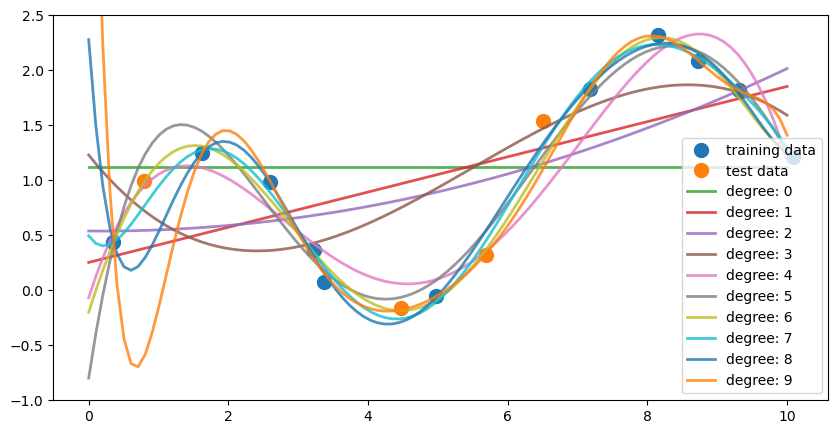

In [19]:
plt.figure(figsize=(10,5))

# plotting training points
plt.plot(X_train, y_train, 'o', label='training data', markersize=10)

# plotting testing points
plt.plot(X_test, y_test, 'o', label='test data', markersize=10)

# plotting the curves
for i, degree in enumerate(degrees):
    plt.plot(np.linspace(0,10,100), array_curves[i], alpha=0.8, lw=2, label='degree: {}'.format(degree))

plt.ylim(-1,2.5)
plt.legend(loc=4)

Polynomial degrees of 6 and 7 seem to fit best - good generalization. (R2 closest to 1)
Degree below 6 in underfitting and over 7 is overfitting.

### Lasso (regularized) polynomial regression
Applying regularization to polynomial regression models.

Comparing two models: a non-regularized LinearRegression model (default parameters) and a regularized Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`) both on polynomial features of degree 12. Return the $R^2$ score for both the LinearRegression and Lasso model's test sets.

In [20]:
from sklearn.linear_model import Lasso

In [21]:
# degrees = range(0, 10)

## data to test the
# test_input = np.linspace(0,10,100).reshape(-1, 1)

# array_curves = np.zeros((10, len(test_input)))
# r2_train = np.zeros(10)
# r2_test = np.zeros(10)

poly = PolynomialFeatures(degree=12)

# artificially generating polynomial for features in X_train with j degrees
X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
X_test_poly = poly.fit_transform(X_test.reshape(-1, 1))

test_input_poly = poly.fit_transform(test_input)

# running linear regression with artificial features
linreg = LinearRegression().fit(X_train_poly, y_train)
lasso = Lasso(alpha=0.01, max_iter=10000).fit(X_train_poly, y_train)

# linear regression scores
r2_linreg_train = linreg.score(X_train_poly, y_train)
# r2_train[i] = r2_t
r2_linreg__test = linreg.score(X_test_poly, y_test)
# r2_test[i] = r2_t
curve_linreg = linreg.predict(test_input_poly)

# lasso regression scores
r2_lasso_train = lasso.score(X_train_poly, y_train)
# r2_train[i] = r2_t
r2_lasso__test = lasso.score(X_test_poly, y_test)
# r2_test[i] = r2_t
curve_lasso = lasso.predict(test_input_poly)

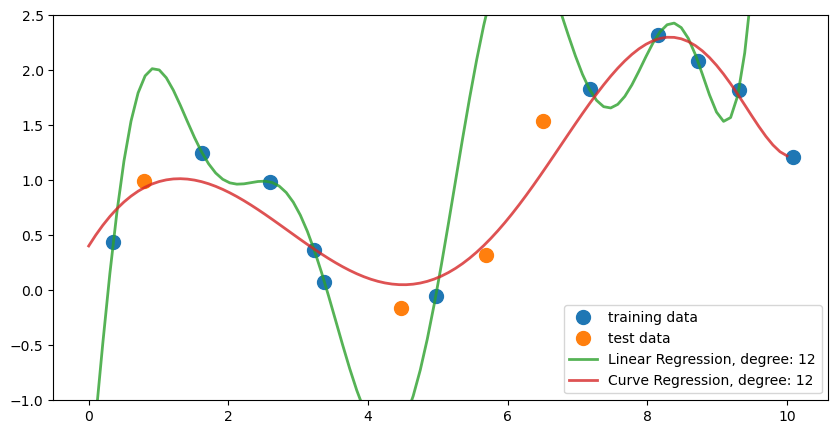

In [22]:
# Visualizing Liner regression and Lasso regression with degree 12
plt.figure(figsize=(10,5))

# plotting training points
plt.plot(X_train, y_train, 'o', label='training data', markersize=10)

# plotting testing points
plt.plot(X_test, y_test, 'o', label='test data', markersize=10)

# plotting the curves
plt.plot(np.linspace(0,10,100), curve_linreg, alpha=0.8, lw=2, label='Linear Regression, degree: {}'.format(12))
plt.plot(np.linspace(0,10,100), curve_lasso, alpha=0.8, lw=2, label='Curve Regression, degree: {}'.format(12))

plt.ylim(-1,2.5)
plt.legend(loc=4)

In [23]:
print('LinearRegression test R2:', r2_linreg__test, 'Lasso Regression test R2:', r2_lasso__test)

LinearRegression test R2: -4.312000761500862 Lasso Regression test R2: 0.8406625614750236
